In [1]:
import numpy as np
from scipy.constants import m_p, e, c, pi
import matplotlib.pyplot as plt
import matplotlib.colors as mplcol

# Problem 1.1

In [2]:
m = m_p * c**2 / e
rho = 4.4 * 10 / (2 * pi)

Ek = np.array([70e6, 800e6])
E = m + Ek
p = np.sqrt(E**2 - m**2)
B = p / rho / c
fB = 50

def Bdip(t): return (B.sum() - (B.max() - B.min())*np.cos(2*pi*fB*t)) / 2
def Bdot(t): return (B.max() - B.min())*pi*fB*np.sin(2*pi*fB*t)

t_max_acc = 1 / (4 * fB)

print(f'Bending Radius (\u03c1) = {rho:.3f} m')
print(f'Minimal Magnetic Field = {B[0]:.3f} T')
print(f'Maximal Magnetic Field = {B[1]:.3f} T')
print(f'Maximal R.o.C of Magnetic Field= {Bdot(t_max_acc):.3f} T/s')

Bending Radius (ρ) = 7.003 m
Minimal Magnetic Field = 0.176 T
Maximal Magnetic Field = 0.697 T
Maximal R.o.C of Magnetic Field= 81.867 T/s


# Problem 1.2 

$$
B(t) = \frac{1}{2}\left(B_{max} + B_{min} - (B_{max} - B_{min})\cos\omega_Bt\right) 
$$
$$
\omega_B = 2\pi\times50 \textrm{Hz};\qquad B_{min} = 0.176\textrm{T};\qquad B_{max} = 0.697\textrm{T}
$$

Text(0, 0.5, '$\\frac{dB}{dt}$ [T/s]')

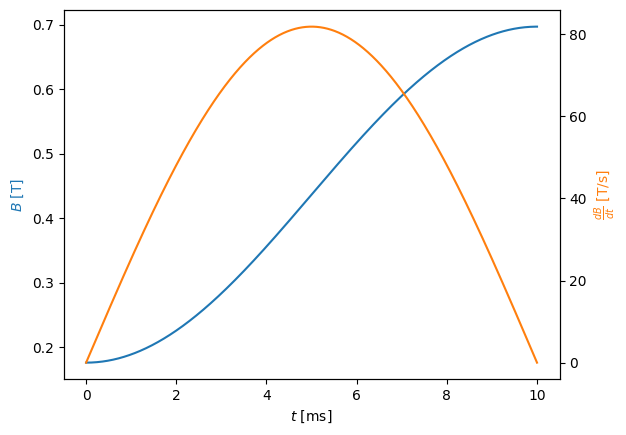

In [3]:
t = np.linspace(0, 0.5 / fB, 1000)
plt.plot(1e3 * t, Bdip(t))
plt.xlabel(r'$t$ [ms]')
plt.ylabel(r'$B$ [T]', color='tab:blue')
ax = plt.twinx()
ax.plot(1e3 * t, Bdot(t), c='tab:orange')
plt.ylabel(r'$\frac{dB}{dt}$ [T/s]', color='tab:orange')



# Problem 1.3

The AC-driven magnets would induce many eddy-currents to flow in a conductive beam pipe, causing Joule heating and likely damaging the machine. Comparison to an induction hob:

Text(0, 0.5, '$\\frac{dB}{dt}$ [T/s]')

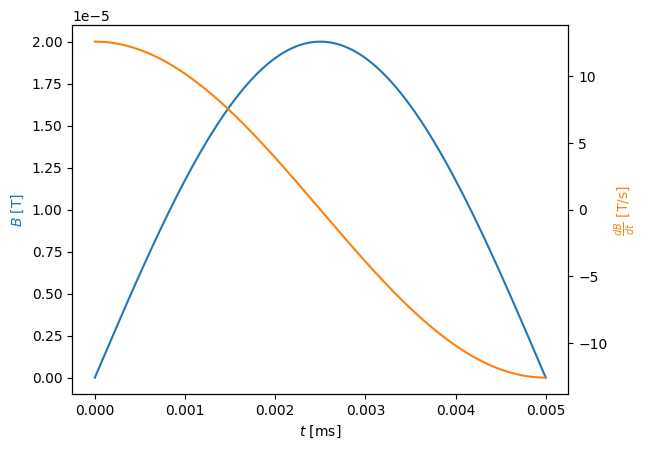

In [4]:
Bh = 20e-6
fhob = 100e3
omegahob = 2 * pi * fhob

def Bhob(t): return Bh*np.sin(omegahob*t)
def Bdothob(t): return Bh*omegahob*np.cos(omegahob*t)

t = np.linspace(0, 0.5 / fhob, 1000)
plt.plot(1e3 * t, Bhob(t))
plt.xlabel(r'$t$ [ms]')
plt.ylabel(r'$B$ [T]', color='tab:blue')
ax = plt.twinx()
ax.plot(1e3 * t, Bdothob(t), c='tab:orange')
plt.ylabel(r'$\frac{dB}{dt}$ [T/s]', color='tab:orange')



# Problem 1.4

In [5]:
R = 26

t = 0

def p_(t): return Bdip(t) * rho * c
def E_(t): return np.sqrt(p_(t)**2 + m**2)
def beta(t): return p_(t) / E_(t)
def fr(t): return beta(t) * c / (2 * pi * R)

print(f'Revolution Frequency @ (t=0 ms) = {1e-6*fr(0):.3f} MHz')
print(f'Revolution Frequency @ (t=10 ms) = {1e-6*fr(10e-3):.3f} MHz')

Revolution Frequency @ (t=0 ms) = 0.672 MHz
Revolution Frequency @ (t=10 ms) = 1.545 MHz


# Problem 1.5

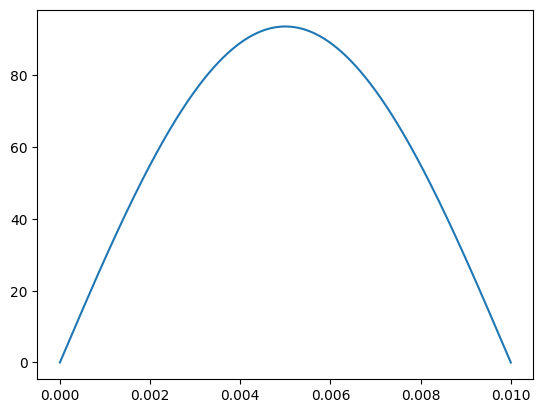

In [6]:
def pdot(t): return Bdot(t) * rho * c
def dEturn(t): return beta(t) * pdot(t) / fr(t)

t = np.linspace(0, 1 / 2 / fB, 1000)
plt.plot(t, 1e-3 * dEturn(t))

# Problem 1.6

In [7]:
n_dip = 10
avg_disp = 1

alpha = avg_disp / R
gamma_t = 1 / np.sqrt(alpha)
Ekt = (gamma_t - 1) * m

print(f'Transition \u03B3  = {gamma_t:.3f}')
print(f'Transition Kinetic Energy = {1e-6*Ekt:.3f} MeV')

def gamma(t): return E_(t) / m
def phase_slip(t): return 1 / gamma(t)**2 - 1 / gamma_t**2

[print(f'\u03B7 @ {1e3*ti:.3f} ms = {phase_slip(ti):.3f}') for ti in [0, 5e-3, 10e-3]];

Transition γ  = 5.099
Transition Kinetic Energy = 3845.996 MeV
η @ 0.000 ms = 0.828
η @ 5.000 ms = 0.473
η @ 10.000 ms = 0.253


# Problem 2.1

In [8]:
V = 19e3
t = 0
h = 2

def phi_s(t): return np.arcsin(dEturn(t) / V)

def dW(phi): return V * (np.sin(phi) - np.sin(phi_s(t)))
def dphi(W): return -2 * pi * h * phase_slip(t) / (m * beta(t)**2 * gamma(t))*W

def iterate_particle(phi, W):
    Wnew = W + dW(phi)
    phinew = phi + dphi(Wnew)
    phinew = (phinew + pi) % (2*pi) - pi
    return [phinew, Wnew]

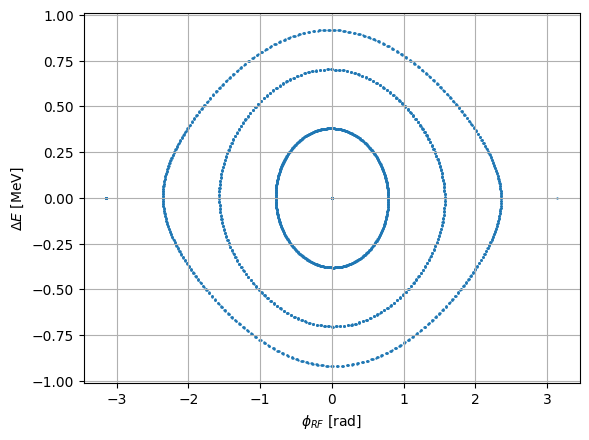

In [9]:
n_turn = 1000
n_p = 5
beam = [[np.linspace(0, pi, n_p), np.zeros(n_p)]]
for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=1, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]
plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.grid(True)

# Problem 2.2

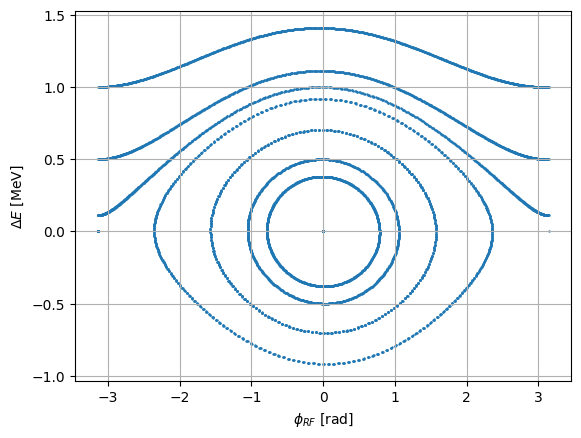

In [10]:
n_turn = 1000
n_p = 5
beam = [[np.concatenate((np.linspace(0, pi, n_p), [0, 0, pi, pi])), np.concatenate((np.zeros(n_p), [0.5e6, 1e6, 0.5e6, 1e6]))]]
for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=1, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]
plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.grid(True)

# Problem 2.3

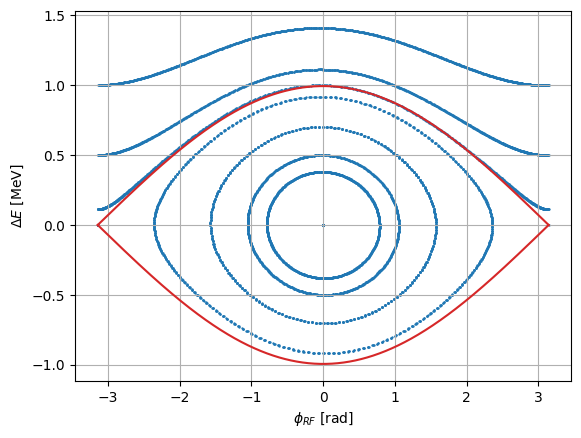

In [11]:
n_turn = 1000
n_p = 5
beam = [[np.concatenate((np.linspace(0, pi, n_p), [0, 0, pi, pi])), np.concatenate((np.zeros(n_p), [0.5e6, 1e6, 0.5e6, 1e6]))]]
for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=1, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]

def dEsep(phi): return np.sqrt(V * beta(t)**2 * E_(t) / (pi * h * phase_slip(t)) * (np.cos(phi_s(t)) + np.cos(phi) + (phi - pi + phi_s(t)) * np.sin(phi_s(t))))

phi = np.linspace(-pi, pi, 1000)
plt.plot(phi, 1e-6*dEsep(phi), c='tab:red')
plt.plot(phi, -1e-6*dEsep(phi), c='tab:red')


plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.grid(True)

# Problem 2.4

In [15]:
V = 150e3
t = 5e-3
print(f'Synchronous Phase = {phi_s(t):.3f} rads')
print(f'Synchronous Phase = {np.degrees(phi_s(t)):.3f}\u00B0')

Synchronous Phase = 0.674 rads
Synchronous Phase = 38.636°


# Problem 2.5

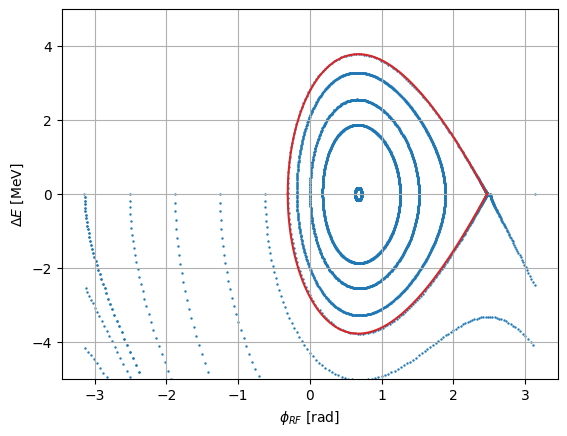

In [16]:
n_turn = 1000
n_p = 11

ufp = pi - phi_s(t)
epsilon = 1e-6

beam = [[np.concatenate((np.linspace(-pi, pi, n_p), [ufp - epsilon])), np.zeros(n_p+1)]]
for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=1, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]

def dEsep(phi): return np.sqrt(V * beta(t)**2 * E_(t) / (pi * h * phase_slip(t)) * (np.cos(phi_s(t)) + np.cos(phi) + (phi - pi + phi_s(t)) * np.sin(phi_s(t))))

from scipy.optimize import minimize
def f_(phi): return np.abs(np.cos(phi_s(t)) + np.cos(phi) + (phi - pi + phi_s(t)) * np.sin(phi_s(t)))
bounds = [-pi, pi - phi_s(t) - epsilon]
phimin = minimize(f_, [0], method='Nelder-Mead', tol=1e-12).x


phi = np.linspace(phimin, pi - phi_s(t), 10000)
plt.plot(phi, 1e-6*dEsep(phi), c='tab:red')
plt.plot(phi, -1e-6*dEsep(phi), c='tab:red')


plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.ylim(-5, 5)
plt.grid(True)

# Problem 2.6

In [14]:
from scipy.integrate import quad

bucket_height = np.sqrt(V * beta(t)**2 / (pi * h * phase_slip(t) * E_(t)) * (2 * np.cos(phi_s(t)) + (2 * phi_s(t) - pi) * np.sin(phi_s(t))))
bucket_area = 2*quad(dEsep, phimin, ufp)[0]

print(f'Bucket Height @ (t = {1e3*t:.3f} ms) = {bucket_height*1e2:.3f}%')
print(f'Bucket Height @ (t = {1e3*t:.3f} ms) = {bucket_height*E_(t)*1e-6:.3f} MeV')
print(f'Bucket Area @ (t = {1e3*t:.3f} ms) = {bucket_area*1e-6:.3f} MeV rad')

Bucket Height @ (t = 5.000 ms) = 0.288%
Bucket Height @ (t = 5.000 ms) = 3.781 MeV
Bucket Area @ (t = 5.000 ms) = 14.538 MeV rad


# Problem 3.1

In [297]:
V = np.array([120e3, 60e3])
theta = np.array([0, 0])
t = 5e-3
h = np.array([2, 4])

def phi_s(t):
    def f_(phi): 
        return np.abs(np.sum(V * np.sin(h * phi + theta)) - dEturn(t))
    return minimize(f_, [0], method='Nelder-Mead', tol=1e-12).x[0]


print(f'Synchronous Phase = {np.degrees(phi_s(t)):.3f}\u00B0')

Synchronous Phase = 12.039°


# Problem 3.2

In [310]:
t = 0

def dW(phi): 
    phi = np.array([phi]*len(V)).T
    hred = h / h[0]
    return np.sum(V * (np.sin(hred*phi + theta) - np.sin(hred*phi_s(t) + theta)), axis=1)
def dphi(W): return -2 * pi * h[0] * phase_slip(t) / (m * beta(t)**2 * gamma(t))*W

def iterate_particle(phi, W):
    Wnew = W + dW(phi)
    phinew = phi + dphi(Wnew)
    phinew = (phinew + pi) % (2*pi) - pi
    return [phinew, Wnew]

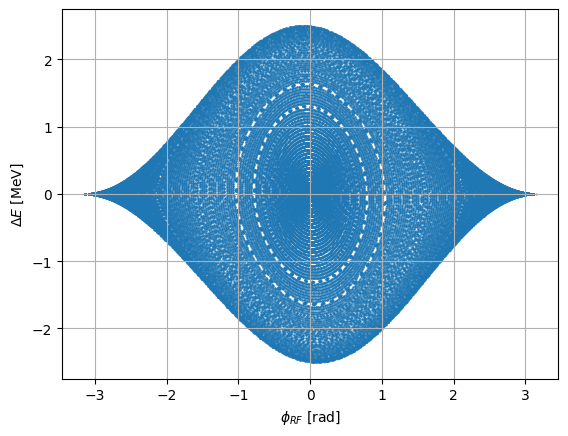

In [311]:
n_turn = 1000
n_p = 101
beam = [[np.linspace(0, pi, n_p), np.zeros(n_p)]]

theta = np.array([0, 0])

for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=0.5, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]
plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.grid(True)

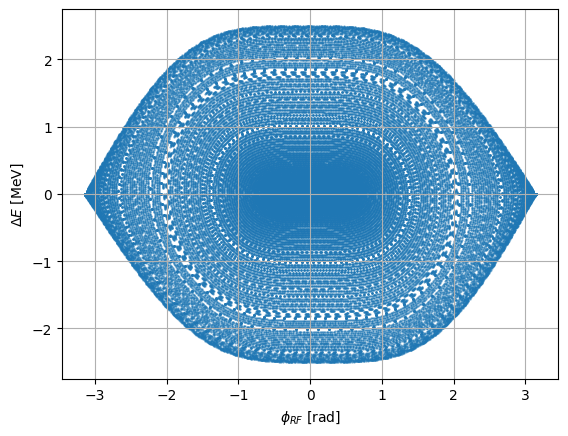

In [312]:
n_turn = 1000
n_p = 101
beam = [[np.linspace(0, pi, n_p), np.zeros(n_p)]]

theta = np.array([0, pi])

for _ in range(n_turn):
    beam.append(iterate_particle(*beam[-1]))
beam = np.array(beam)

[plt.scatter(particle[0], 1e-6*particle[1], s=0.5, alpha=0.5, c='tab:blue') for particle in np.transpose(beam, [2, 1, 0])]
plt.xlabel(r'$\phi_{RF}$ [rad]')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.grid(True)